In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
import cv2
img_786=cv2.imread('avatar.jpg',0)

PADDING

In [29]:
constant_786=np.pad(img_786,((101,101),(101,101)),mode='constant')
reflect_786=np.pad(img_786,((101,101),(101,101)),mode='reflect')
wrap_786=np.pad(img_786,((101,101),(101,101)),mode='wrap')
edge_786=np.pad(img_786,((101,101),(101,101)),mode='edge')
histo_786, bin_edge = np.histogram(img_786, bins=np.arange(257))
xs_786 = histo_786 / sum(histo_786)

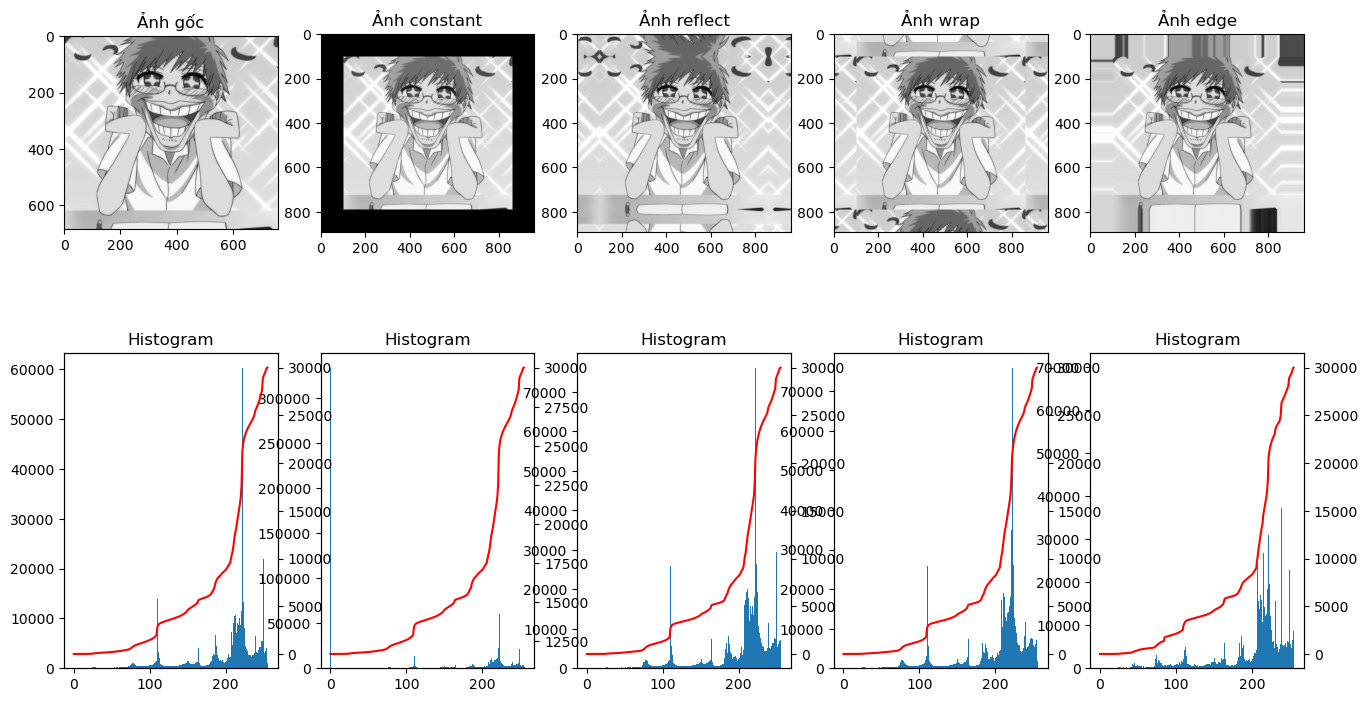

In [30]:
fig,anh=plt.subplots(2,5,figsize=(16,9))
anh[0,0].imshow(img_786,cmap='gray')
anh[0,0].set_title('Ảnh gốc')
anh[0,1].imshow(constant_786,cmap='gray')
anh[0,1].set_title('Ảnh constant')
anh[0,2].imshow(reflect_786,cmap='gray')
anh[0,2].set_title('Ảnh reflect')
anh[0,3].imshow(wrap_786,cmap='gray')
anh[0,3].set_title('Ảnh wrap')
anh[0,4].imshow(edge,cmap='gray')
anh[0,4].set_title('Ảnh edge')

anh[1,0].hist(img_786.ravel(),256,[0,256])
anh[1,1].hist(constant_786.ravel(),256,[0,256])
anh[1,2].hist(reflect_786.ravel(),256,[0,256])
anh[1,3].hist(wrap_786.ravel(),256,[0,256])
anh[1,4].hist(edge_786.ravel(),256,[0,256])
anh[1,0].set_title('Histogram')
anh[1,1].set_title('Histogram')
anh[1,2].set_title('Histogram')
anh[1,3].set_title('Histogram')
anh[1,4].set_title('Histogram')
histt=anh[1,0].twinx()
histt.plot(np.arange(256),xs_786.cumsum()*3e+4,color='red')

histo2, bin_edge2 = np.histogram(constant_786, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
histt=anh[1,1].twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')

histo3, bin_edge2 = np.histogram(reflect_786, bins=np.arange(257))
xs3 = histo3 / sum(histo3)
histt=anh[1,2].twinx()
histt.plot(np.arange(256),xs3.cumsum()*3e+4,color='red')

histo4, bin_edge2 = np.histogram(wrap_786, bins=np.arange(257))
xs4 = histo4 / sum(histo4)
histt=anh[1,3].twinx()
histt.plot(np.arange(256),xs4.cumsum()*3e+4,color='red')

histo5, bin_edge2 = np.histogram(edge_786, bins=np.arange(257))
xs5 = histo5 / sum(histo5)
histt=anh[1,4].twinx()
histt.plot(np.arange(256),xs5.cumsum()*3e+4,color='red')


NHIEU GAUSS

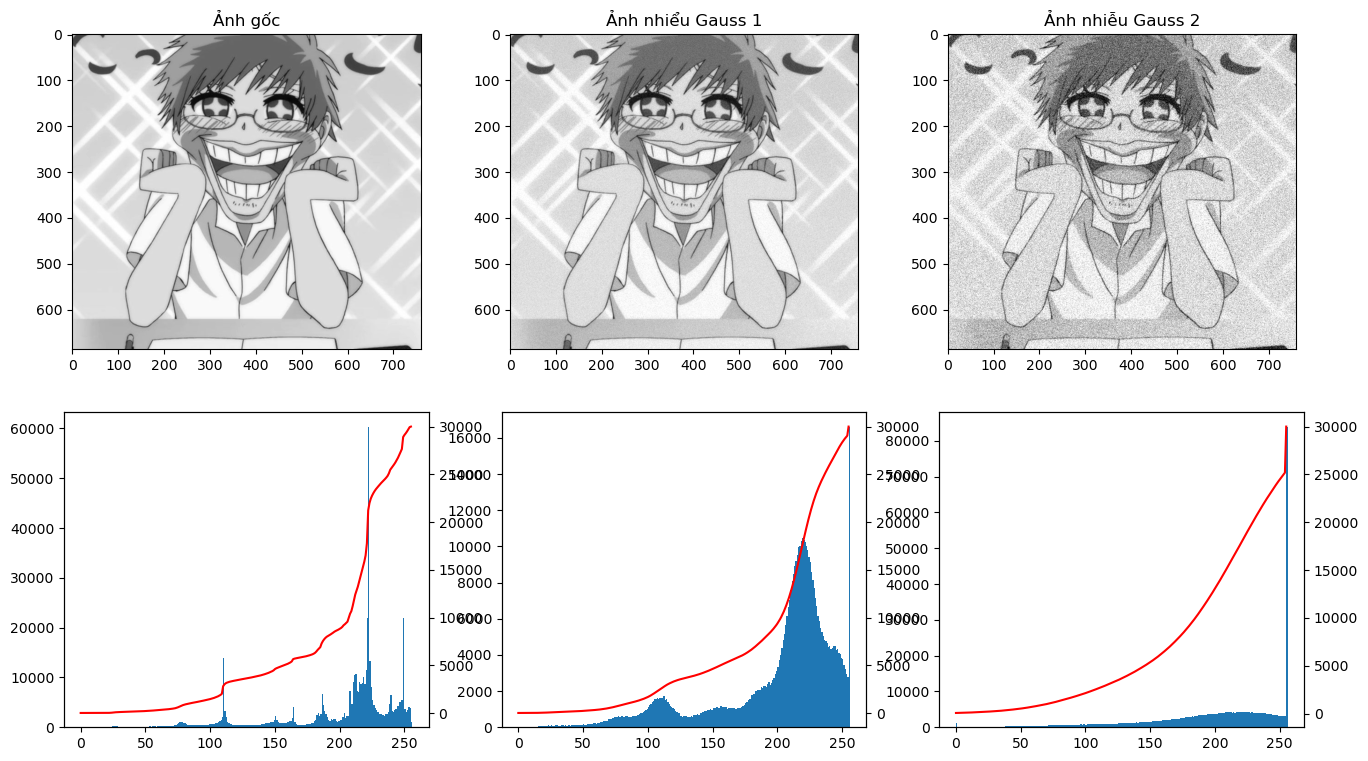

In [31]:
noise1_786=random_noise(img_786,mode='gaussian',mean=0,var=0.001)
noise1_786=np.array(noise1_786*255,dtype='uint8')
noise2_786=random_noise(img_786,mode='gaussian',mean=0,var=0.02)
noise2_786=np.array(noise2_786*255,dtype='uint8')
fig1,anh=plt.subplots(2,3,figsize=(16,9))
anh[0,0].imshow(img_786,cmap='gray')
anh[0,1].imshow(noise1_786,cmap='gray')
anh[0,2].imshow(noise2_786,cmap='gray')
anh[0,0].set_title('Ảnh gốc')
anh[0,1].set_title('Ảnh nhiểu Gauss 1')
anh[0,2].set_title('Ảnh nhiễu Gauss 2')
anh[1,0].hist(img_786.ravel(),256,[0,256])
anh[1,1].hist(noise1_786.ravel(),256,[0,256])
anh[1,2].hist(noise2_786.ravel(),256,[0,256])
histt=anh[1,0].twinx()
histt.plot(np.arange(256),xs_786.cumsum()*3e+4,color='red')
histo2_786, bin_edge2 = np.histogram(noise1_786, bins=np.arange(257))
xs2_786 = histo2_786 / sum(histo2_786)
histt=anh[1,1].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')
histo2_786, bin_edge2 = np.histogram(noise2_786, bins=np.arange(257))
xs2_786 = histo2_786 / sum(histo2_786)
histt=anh[1,2].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')


Nhieu SALT & PEPPER

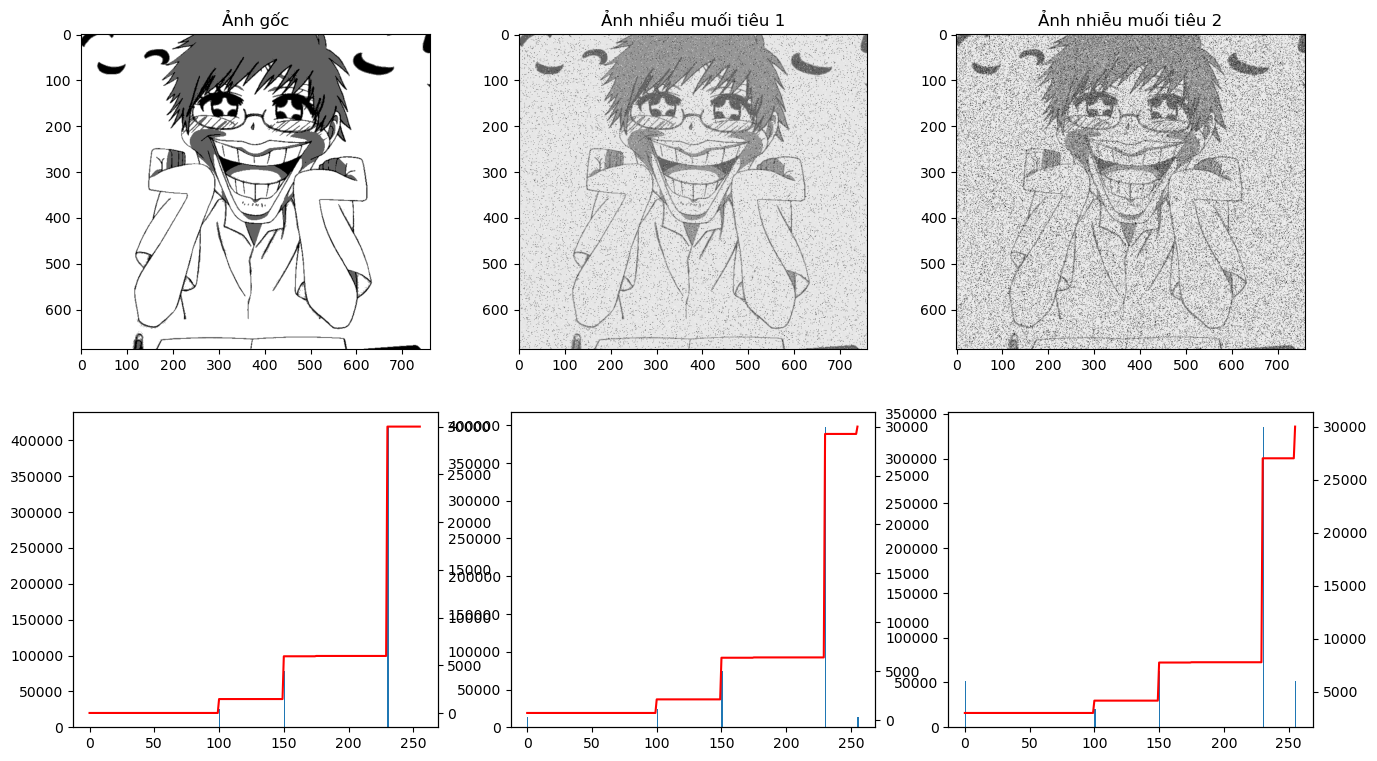

In [32]:
salt_pepper_786=np.copy(img_786)
salt_pepper_786[salt_pepper_786<100]=100
salt_pepper_786[(salt_pepper_786>100)&(salt_pepper_786<175)]=150
salt_pepper_786[salt_pepper_786>175]=230
noise1_786=random_noise(salt_pepper_786,mode='s&p')
noise1_786=np.array(255*noise1_786,dtype='uint8')
noise2_786=random_noise(salt_pepper_786,'s&p',amount=0.2)
noise2_786=np.array(255*noise2_786,dtype='uint8')
fig2,anh=plt.subplots(2,3,figsize=(16,9))
anh[0,0].imshow(salt_pepper_786,cmap='gray')
anh[0,1].imshow(noise1_786,cmap='gray')
anh[0,2].imshow(noise2_786,cmap='gray')
anh[0,0].set_title('Ảnh gốc')
anh[0,1].set_title('Ảnh nhiểu muối tiêu 1')
anh[0,2].set_title('Ảnh nhiễu muối tiêu 2')
anh[1,0].hist(salt_pepper_786.ravel(),256,[0,256])
anh[1,1].hist(noise1_786.ravel(),256,[0,256])
anh[1,2].hist(noise2_786.ravel(),256,[0,256])
histo2_786, bin_edge2 = np.histogram(salt_pepper_786, bins=np.arange(257))
xs2_786 = histo2_786 / sum(histo2_786)
histt=anh[1,0].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')
histo2_786, bin_edge2 = np.histogram(noise1_786, bins=np.arange(257))
xs2_786 = histo2_786 / sum(histo2_786)
histt=anh[1,1].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')
histo2_786, bin_edge2 = np.histogram(noise2_786, bins=np.arange(257))
xs2_786 = histo2_786 / sum(histo2_786)
histt=anh[1,2].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')



NHIEU TUAN HOAN

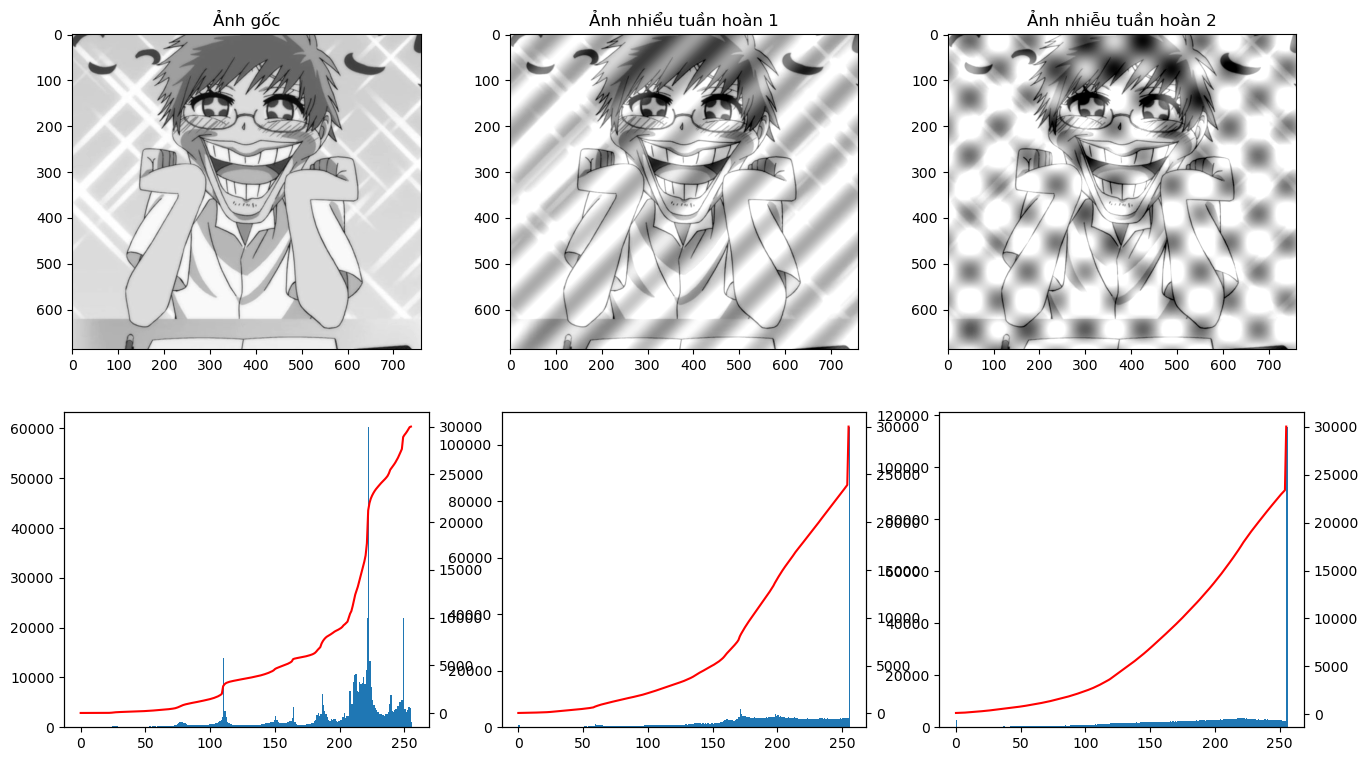

In [33]:
from numpy.lib import math


singray_786=img_786.copy()
for i in range(singray_786.shape[0]):
    for j in range(singray_786.shape[1]):
        tmp_786=singray_786[i,j]+math.sin((i+j)/20)*255/5
        if tmp_786>255: tmp_786=255
        elif tmp_786<0: tmp_786=0
        singray_786[i,j]=tmp_786
nhieu_TH1_786=np.array(singray_786,dtype='uint8')
singray_786=img_786.copy()
for i in range(singray_786.shape[0]):
    for j in range(singray_786.shape[1]):
        tmp_786=singray_786[i,j]+(math.sin((i-j)/20) + math.cos((i+j)/20))*255/5
        if tmp_786>255: tmp_786=255
        elif tmp_786<0: tmp_786=0
        singray_786[i,j]=tmp_786
nhieu_TH2_786=np.array(singray_786,dtype='uint8')
fig3,anh=plt.subplots(2,3,figsize=(16,9))
anh[0,0].imshow(img_786,cmap='gray')
anh[0,1].imshow(nhieu_TH1_786,cmap='gray')
anh[0,2].imshow(nhieu_TH2_786,cmap='gray')
anh[0,0].set_title('Ảnh gốc')
anh[0,1].set_title('Ảnh nhiểu tuần hoàn 1')
anh[0,2].set_title('Ảnh nhiễu tuần hoàn 2')
anh[1,0].hist(img_786.ravel(),256,[0,256])
anh[1,1].hist(nhieu_TH1_786.ravel(),256,[0,256])
anh[1,2].hist(nhieu_TH2_786.ravel(),256,[0,256])
histt=anh[1,0].twinx()
histt.plot(np.arange(256),xs_786.cumsum()*3e+4,color='red')
histo2, bin_edge2 = np.histogram(nhieu_TH1_786, bins=np.arange(257))
xs2_786 = histo2 / sum(histo2)
histt=anh[1,1].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')
histo2, bin_edge2 = np.histogram(nhieu_TH2_786, bins=np.arange(257))
xs2_786 = histo2 / sum(histo2)
histt=anh[1,2].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')

LÀM MỜ ẢNH

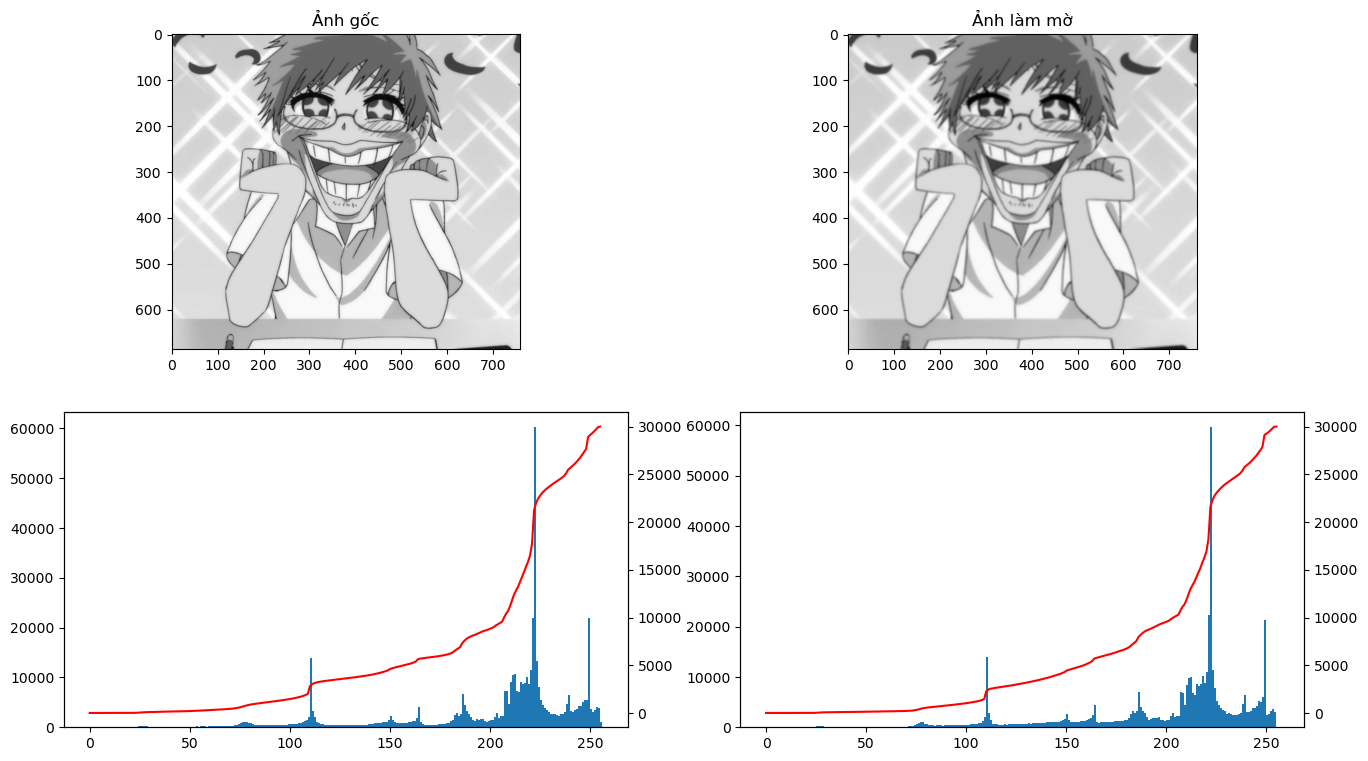

In [34]:
blur_786=cv2.blur(img_786,(5,5))
fig4,anh=plt.subplots(2,2,figsize=(16,9))
anh[0,0].imshow(img_786,cmap='gray')
anh[0,1].imshow(blur_786,cmap='gray')
anh[0,0].set_title('Ảnh gốc')
anh[0,1].set_title('Ảnh làm mờ')
anh[1,0].hist(img_786.ravel(),256,[0,256])
anh[1,1].hist(blur_786.ravel(),256,[0,256])
histt=anh[1,0].twinx()
histt.plot(np.arange(256),xs_786.cumsum()*3e+4,color='red')
histo2_786, bin_edge2 = np.histogram(blur_786, bins=np.arange(257))
xs2_786 = histo2_786 / sum(histo2_786)
histt=anh[1,1].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')

LỌC TRUNG VỊ

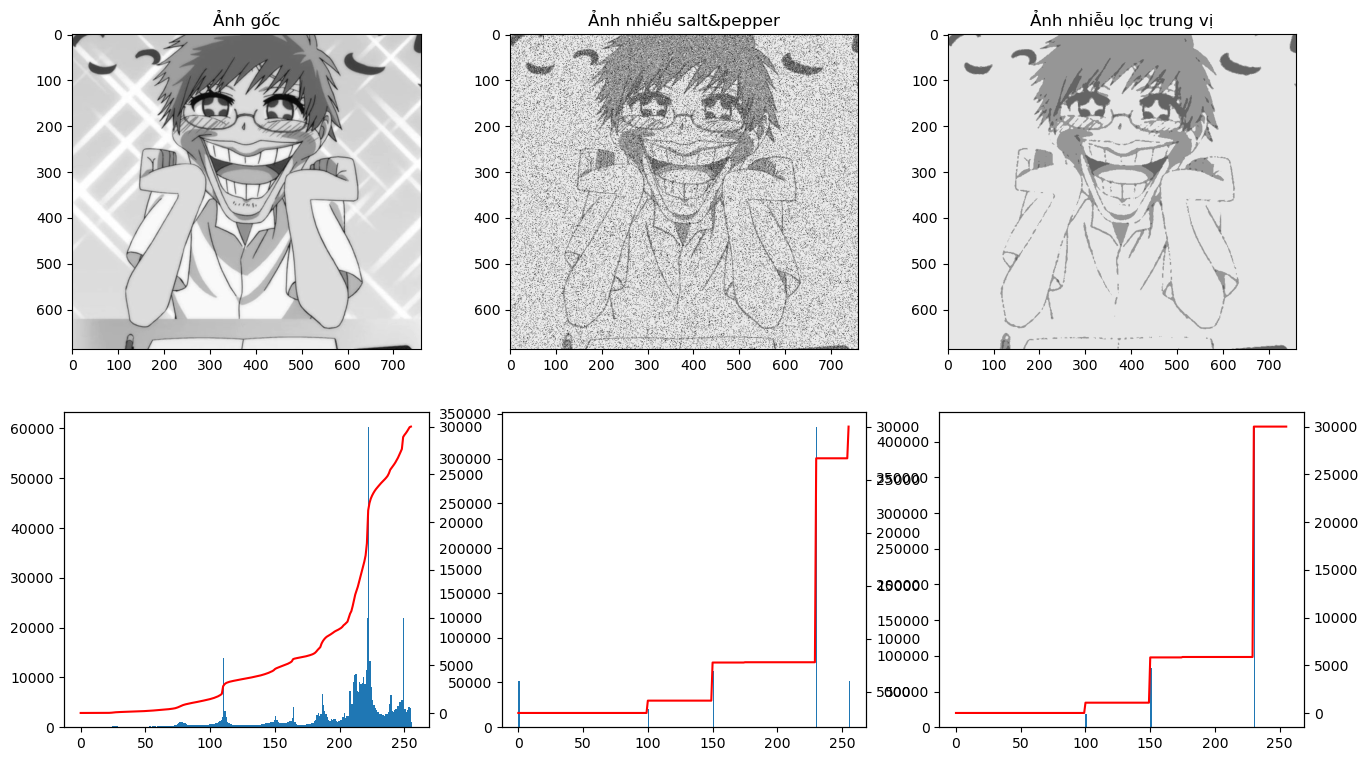

In [35]:
median_786=cv2.medianBlur(noise2_786, 5)
fig5,anh=plt.subplots(2,3,figsize=(16,9))
anh[0,0].imshow(img_786,cmap='gray')
anh[0,1].imshow(noise2_786,cmap='gray')
anh[0,2].imshow(median_786,cmap='gray')
anh[0,0].set_title('Ảnh gốc')
anh[0,1].set_title('Ảnh nhiểu salt&pepper')
anh[0,2].set_title('Ảnh nhiễu lọc trung vị')
anh[1,0].hist(img_786.ravel(),256,[0,256])
anh[1,1].hist(noise2_786.ravel(),256,[0,256])
anh[1,2].hist(median_786.ravel(),256,[0,256])
histt=anh[1,0].twinx()
histt.plot(np.arange(256),xs_786.cumsum()*3e+4,color='red')
histo2_786, bin_edge2 = np.histogram(noise2_786, bins=np.arange(257))
xs2_786 = histo2_786 / sum(histo2_786)
histt=anh[1,1].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')
histo2_786, bin_edge2 = np.histogram(median_786, bins=np.arange(257))
xs2_786 = histo2_786 / sum(histo2_786)
histt=anh[1,2].twinx()
histt.plot(np.arange(256),xs2_786.cumsum()*3e+4,color='red')